[Semantic Segmentation Tutorial](https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/)

In [1]:
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [72]:
df = pd.read_csv('data/train_complete.csv')
df.head(20)

,FilePath,ImageId,ClassId,EncodedPixels,Defect
0,/Users/fabioteichmann/neuefische/projects/Caps...,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,1
1,/Users/fabioteichmann/neuefische/projects/Caps...,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,1
2,/Users/fabioteichmann/neuefische/projects/Caps...,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,1
3,/Users/fabioteichmann/neuefische/projects/Caps...,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
4,/Users/fabioteichmann/neuefische/projects/Caps...,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,1
5,/Users/fabioteichmann/neuefische/projects/Caps...,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,1
6,/Users/fabioteichmann/neuefische/projects/Caps...,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...,1
7,/Users/fabioteichmann/neuefische/projects/Caps...,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...,1
8,/Users/fabioteichmann/neuefische/projects/Caps...,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...,1
9,/Users/fabioteichmann/neuefische/projects/Caps...,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...,1


(256, 1600, 3)


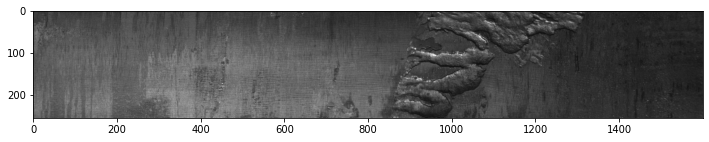

In [73]:
image_path = 'data/train_images/0030401a5.jpg'

image = plt.imread(image_path)
print(image.shape)
plt.figure(figsize=(12,12))
plt.imshow(image);

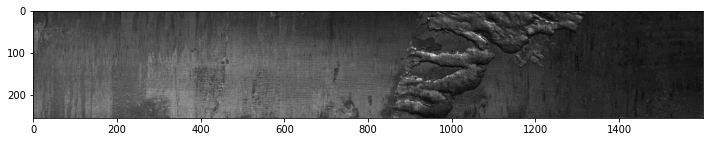

In [74]:
gray_train = rgb2gray(image)
plt.figure(figsize=(12,12))
plt.imshow(gray_train, cmap='gray')

In [6]:
gray_train.shape

(256, 1600)

---

### Threshold segmentation

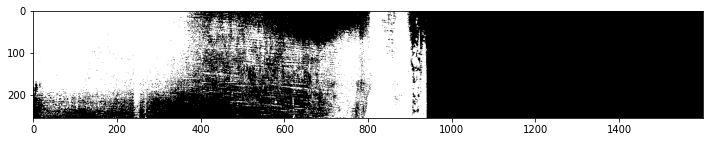

In [9]:
gray_r = gray_train.reshape(gray_train.shape[0]*gray_train.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray_train = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.figure(figsize=(12,12))
plt.imshow(gray_train, cmap='gray');

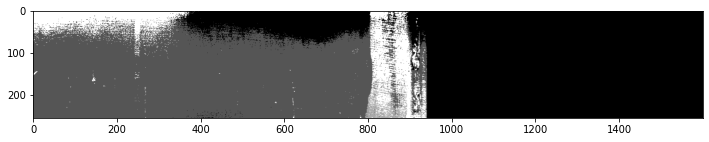

In [8]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.figure(figsize=(12,12))
plt.imshow(gray, cmap='gray')

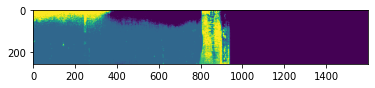

In [10]:
plt.imshow(gray)#, cmap='gray')

---

### Edge detection

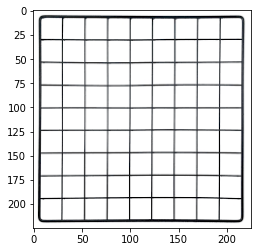

In [11]:
board = plt.imread('data/segmentation_tut/index.png')
plt.imshow(board);

In [12]:
board.shape

(225, 225, 4)

`.png` images have one color channel too much, so convert it to `.jpg`

In [13]:
#importing required packages and library
import cv2

# Loading .png image
png_img = cv2.imread('data/segmentation_tut/index.png')

# converting to jpg file
#saving the jpg file
cv2.imwrite('data/segmentation_tut/index.jpg', png_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])



True

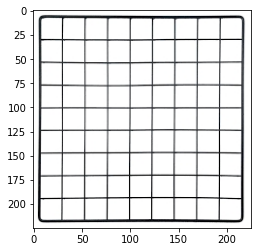

In [14]:
board = plt.imread('data/segmentation_tut/index.jpg')
plt.imshow(board);

In [15]:
board.shape

(225, 225, 3)

Filters need to be applied to the gray-scale picture!

In [16]:
# converting to grayscale
gray = rgb2gray(board)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [17]:
print(sobel_horizontal.shape)
print(sobel_vertical.shape)

(3, 3)
(3, 3)


In [18]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

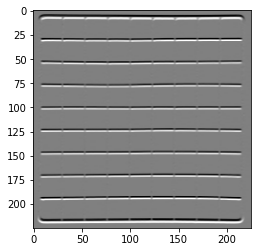

In [19]:
plt.imshow(out_h, cmap='gray')

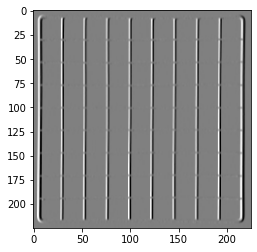

In [20]:
plt.imshow(out_v, cmap='gray')


In [21]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


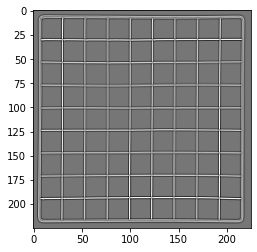

In [22]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [23]:
gray.shape

(225, 225)

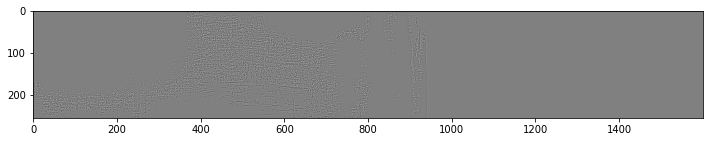

In [24]:
out_l = ndimage.convolve(gray_train, kernel_laplace, mode='reflect')
plt.figure(figsize=(12,10))
plt.imshow(out_l, cmap='gray')

---

### Segmentation through clustering

(256, 1600, 3)


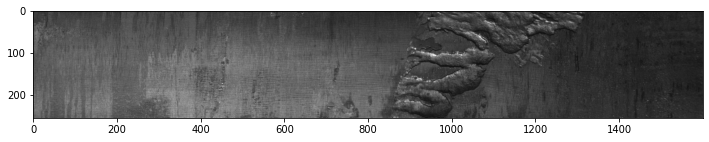

In [75]:
pic = plt.imread(image_path)/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.figure(figsize=(12,10))
plt.imshow(pic);

In [76]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(409600, 3)

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [100]:
pic2show

array([[0.31247108, 0.31247108, 0.31247108],
       [0.31247108, 0.31247108, 0.31247108],
       [0.31247108, 0.31247108, 0.31247108],
       ...,
       [0.17852514, 0.17852514, 0.17852514],
       [0.17852514, 0.17852514, 0.17852514],
       [0.17852514, 0.17852514, 0.17852514]])

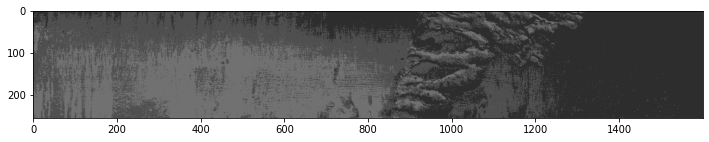

In [86]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.figure(figsize=(12,10))
plt.imshow(cluster_pic);

In [81]:
cluster_pic.shape

(256, 1600, 3)

In [92]:
kmeans.labels_.shape

(409600,)

In [102]:
mask_pic = kmeans.labels_.reshape(pic.shape[0], pic.shape[1])
mask_pic.shape

(256, 1600)

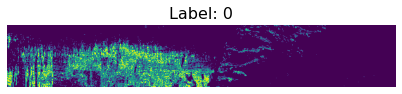

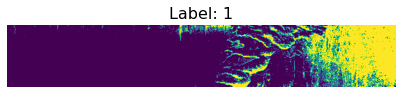

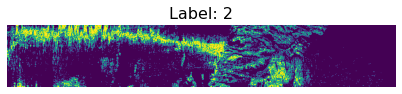

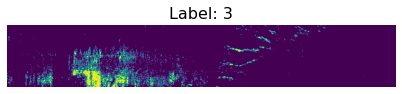

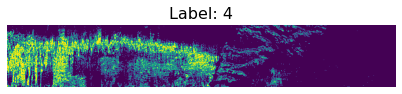

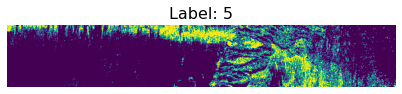

In [103]:
# get unique values in kmeans labels
labels = list(set(kmeans.labels_))

for label in labels:
    DIMENSION = mask_pic.shape
    encoded_pixels=mask_conversion.encode_pixel(mask_pic, label)
    
    mask = mask_conversion.decode_pixel(DIMENSION,encoded_pixels=encoded_pixels,class_id=1)

    plt.figure(figsize=(25, 8))
        
    ax = plt.subplot(len(labels), 1, label + 1)
    #plt.imshow(img)
    title = f'Label: {label}'
    
    plt.title(title, fontsize=16);
    plt.axis("off")

    plt.imshow(mask)

In [32]:
# self-written scripts
import sys
sys.path.insert(0, 'Python_Scripts')

import util
import surf_handling
import surf_hog_analysis
import mask_conversion

In [34]:
mask_conversion.encode_pixel(mask_pic, 0)

'233767 1 234255 1 235296 1 235552 1 235781 3 235787 1 236035 4 239629 1 240642 7 240650 2 240658 2 240897 24 240922 2 240926 11 240938 1 240946 2 240950 1 241139 1 241152 1 241153 26 241180 28 241287 1 241326 1 241375 1 241380 1 241406 1 241409 49 241460 11 241487 1 241490 1 241492 1 241495 1 241497 1 241507 1 241515 1 241524 1 241528 1 241578 1 241597 1 241611 1 241623 1 241626 1 241630 1 241633 1 241645 1 241652 2 241655 1 241658 1 241660 1 241663 1 241665 67 241739 2 241744 1 241888 1 241901 1 241908 1 241912 3 241920 1 241921 62 241984 5 241990 8 241999 2 242005 1 242026 2 242053 2 242079 2 242098 1 242100 1 242103 1 242120 1 242154 1 242157 1 242164 1 242177 80 242259 17 242278 3 242289 1 242298 2 242309 2 242321 1 242330 7 242338 2 242342 11 242354 4 242382 2 242385 3 242392 2 242404 1 242408 4 242413 2 242416 12 242433 256 242689 256 242945 256 243201 256 243457 256 243713 256 243969 256 244225 256 244481 256 244737 256 244993 256 245249 256 245505 256 245761 256 246017 256 246